---
---

# **Análise Exploratória de Dados - Video Game Sales**

---
---
(introduzir)

---


##Carregamento das bibliotecas e dos dados


---

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from pandas_profiling import ProfileReport

%matplotlib inline
plt.rc('figure', figsize = (20,10))

In [ ]:
# Carregando o dataset
dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/CSV/vgsales.csv")

In [ ]:
# Visualizando as 5 primeiras colunas no dataset
dataframe.head()

Rank             Name Platform  ...  JP_Sales Other_Sales Global_Sales
0   259        Asteroids     2600  ...       0.0        0.05         4.31
1   545  Missile Command     2600  ...       0.0        0.03         2.76
2  1768          Kaboom!     2600  ...       0.0        0.01         1.15
3  1971         Defender     2600  ...       0.0        0.01         1.05
4  2671           Boxing     2600  ...       0.0        0.01         0.77

[5 rows x 11 columns]

In [ ]:
# Visualizando as 5 ultimas colunas no dataset
dataframe.tail()

Rank  ... Global_Sales
16319  16565  ...         0.01
16320  16572  ...         0.01
16321  16573  ...         0.01
16322  16579  ...         0.01
16323  16592  ...         0.01

[5 rows x 11 columns]

In [ ]:
# Mudando as colunas para o português

dataframe.columns = ["Ranking", "Nome", "Plataforma", "Ano", 
"Genero", "Editora", "vendas_America_do_Norte", "vendas_Europa", "vendas_Japao", 
"vendas_outras", "vendas_Globais"]

dataframe.head()

Ranking             Nome  ... vendas_outras  vendas_Globais
0      259        Asteroids  ...          0.05            4.31
1      545  Missile Command  ...          0.03            2.76
2     1768          Kaboom!  ...          0.01            1.15
3     1971         Defender  ...          0.01            1.05
4     2671           Boxing  ...          0.01            0.77

[5 rows x 11 columns]

In [ ]:
# Checando quais colunas tem valores nulos em seus registros
# Somente 'Editora' possui valores nulos, então não vou apagá-los
dataframe.isnull().sum()

Ranking                     0
Nome                        0
Plataforma                  0
Ano                         0
Genero                      0
Editora                    36
vendas_America_do_Norte     0
vendas_Europa               0
vendas_Japao                0
vendas_outras               0
vendas_Globais              0
dtype: int64

In [ ]:
# Checando a existência de registros duplicados
len(dataframe[dataframe.duplicated()])

0

In [ ]:
# Verificando quais são os tipos de das variáveis do dataframe
dataframe.dtypes

Ranking                      int64
Nome                        object
Plataforma                  object
Ano                          int64
Genero                      object
Editora                     object
vendas_America_do_Norte    float64
vendas_Europa              float64
vendas_Japao               float64
vendas_outras              float64
vendas_Globais             float64
dtype: object

In [ ]:
# Visualisando as descrições estatísticas do dataset
dataframe[['vendas_America_do_Norte', 'vendas_Europa', 'vendas_Japao', 'vendas_outras', 'vendas_Globais']].describe().round(2)

vendas_America_do_Norte  vendas_Europa  ...  vendas_outras  vendas_Globais
count                 16324.00       16324.00  ...       16324.00        16324.00
mean                      0.27           0.15  ...           0.05            0.54
std                       0.82           0.51  ...           0.19            1.57
min                       0.00           0.00  ...           0.00            0.01
25%                       0.00           0.00  ...           0.00            0.06
50%                       0.08           0.02  ...           0.01            0.17
75%                       0.24           0.11  ...           0.04            0.48
max                      41.49          29.02  ...          10.57           82.74

[8 rows x 5 columns]

In [ ]:
!pip install -U pandas-profiling

In [ ]:
profile = ProfileReport(dataframe)

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---


##Qual o grau de correlação entre as variáveis?


---

In [ ]:
# criando a variável referente à correlação dos dados
correlacao = dataframe[['vendas_America_do_Norte', 'vendas_Europa', 'vendas_Japao', 'vendas_outras', 'vendas_Globais']].corr()
correlacao

vendas_America_do_Norte  ...  vendas_Globais
vendas_America_do_Norte                 1.000000  ...        0.941267
vendas_Europa                           0.768932  ...        0.903269
vendas_Japao                            0.451280  ...        0.612790
vendas_outras                           0.634503  ...        0.747971
vendas_Globais                          0.941267  ...        1.000000

[5 rows x 5 columns]

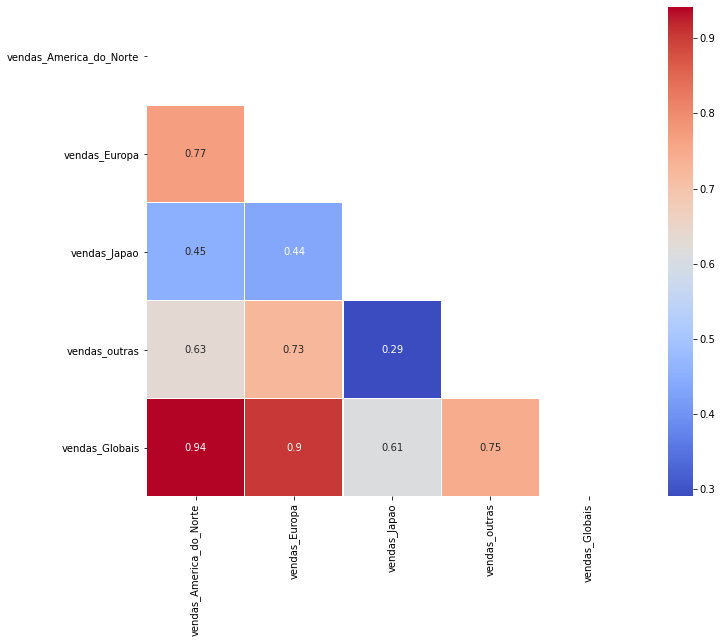

In [ ]:
# Plotando o heatmap apartir dos dados acima
plt.figure(figsize=(11,9))

mask = np.triu(np.ones_like(correlacao, dtype=bool))

sns.heatmap(correlacao, mask = mask, annot = True, cmap = 'coolwarm', linewidths=.2)

O gráfico acima retrata a correlação entre as variáveis do dataframe. Os números apresentados acima são calculados por meio do "Coeficiente de correlação de Pearson": 



---



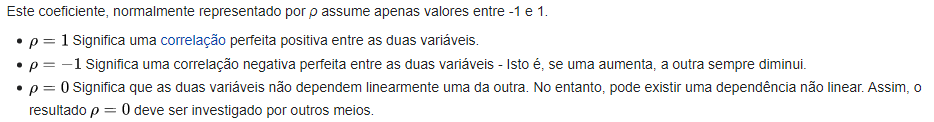



---



Nota-se portanto, que existe uma grande correlação das vendas da América do Norte e Europa com as vendas Globais.

In [ ]:
#Fazer um lmplot das vendas das diferentes regiões com as globais

---


##Como foram as vendas globais ao longo dos anos?


---

In [ ]:
por_ano = dataframe.groupby('Ano')
vendas_por_ano = por_ano['vendas_Globais'].sum()

vendas_por_ano = pd.DataFrame(vendas_por_ano)
vendas_por_ano = vendas_por_ano.reset_index()
vendas_por_ano.head(5)

Ano  vendas_Globais
0  1980           11.38
1  1981           35.77
2  1982           28.86
3  1983           16.79
4  1984           50.36

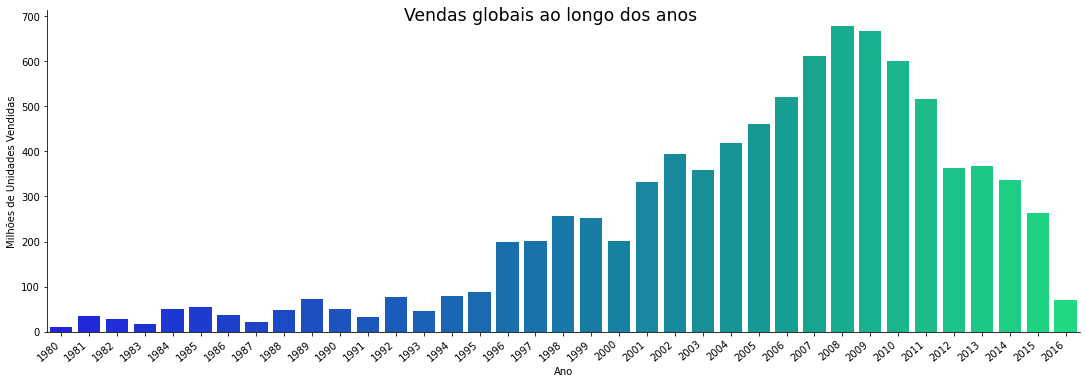

In [ ]:
g_vendasGlobais_porAno = sns.catplot(
    data = vendas_por_ano,
    x = 'Ano', 
    y = 'vendas_Globais',
    kind = 'bar',
    aspect = 3,
    palette = 'winter'
    
)

g_vendasGlobais_porAno.set_xticklabels(rotation = 40, horizontalalignment='right')
g_vendasGlobais_porAno.fig.suptitle('Vendas globais ao longo dos anos', fontsize = 'xx-large')
g_vendasGlobais_porAno.set_ylabels('Milhões de Unidades Vendidas')


Text(0.5, 0, 'Ano')

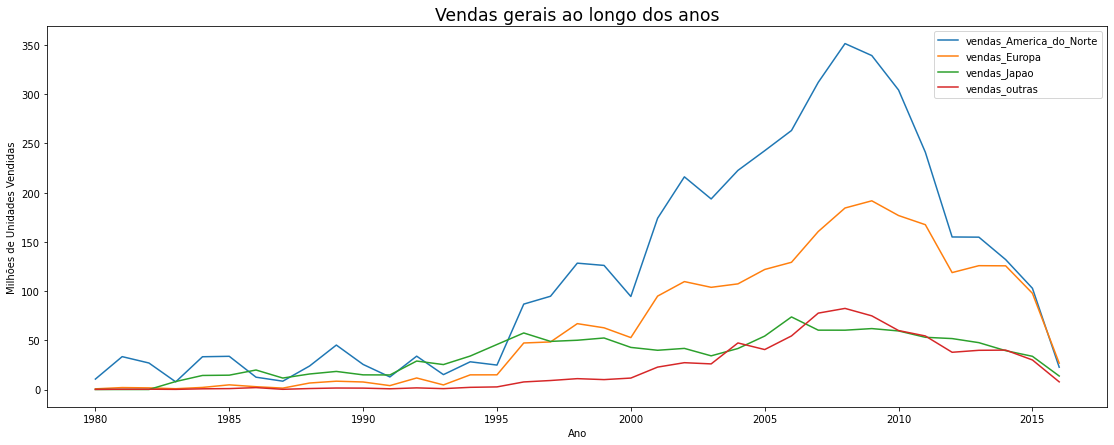

In [ ]:
somaVendas_porAno = por_ano[['vendas_America_do_Norte', 'vendas_Europa', 'vendas_Japao', 'vendas_outras']].sum()

somaVendas_porAno.plot(figsize=(19, 7))
plt.title('Vendas gerais ao longo dos anos', fontsize='xx-large')
plt.ylabel('Milhões de Unidades Vendidas')
plt.xlabel('Ano')


In [ ]:
print(f'Soma total de vendas América do Norte: {((dataframe["vendas_America_do_Norte"].sum())/1000).round(2)} Bilhões')
print(f'Soma total de vendas Europa: {((dataframe["vendas_Europa"].sum())/1000).round(2)} Bilhões')
print(f'Soma total de vendas Japão: {((dataframe["vendas_Japao"].sum())/1000).round(2)} Bilhões')
print(f'Soma total de vendas de outras regiões: {((dataframe["vendas_outras"].sum())/1000).round(2)} Bilhões')


Soma total de vendas América do Norte: 4.33 Bilhões
Soma total de vendas Europa: 2.41 Bilhões
Soma total de vendas Japão: 1.28 Bilhões
Soma total de vendas de outras regiões: 0.79 Bilhões


In [ ]:
valor_1 = ((dataframe["vendas_America_do_Norte"].sum())/1000).round(2)
valor_2 = ((dataframe["vendas_Europa"].sum())/1000).round(2)
valor_3 = ((dataframe["vendas_Japao"].sum())/1000).round(2)
valor_4 = ((dataframe["vendas_outras"].sum())/1000).round(2)

somaVendas = pd.DataFrame({
    'Região': ['América do norte', 'Europa', 'Japão', 'Outras'],
    'Soma de Vendas': [valor_1, valor_2, valor_3, valor_4]
})

In [ ]:
somaVendas

Região  Soma de Vendas
0  América do norte            4.33
1            Europa            2.41
2             Japão            1.28
3            Outras            0.79

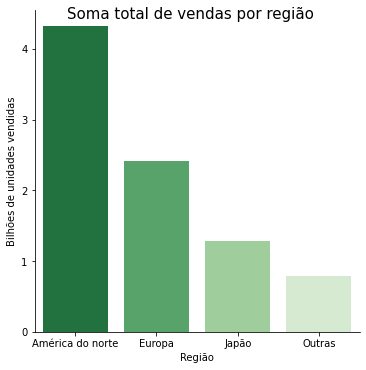

In [ ]:
g = sns.catplot(
    data = somaVendas,
    x = 'Região',
    y = 'Soma de Vendas',
    kind = 'bar',
    palette = 'Greens_r'
)

g.fig.suptitle('Soma total de vendas por região', fontsize=15)
g.set_ylabels('Bilhões de unidades vendidas')

---


##Qual a variação nas vendas globais?

---

In [ ]:
area = plt.figure(figsize=[15, 5])

<Figure size 1080x360 with 0 Axes>

In [ ]:
g1 = area.add_subplot(1, 2, 1)
g2 = area.add_subplot(1, 2, 2)

In [ ]:
g1.boxplot(dataframe['vendas_Globais'])
g1.set_title('Distribuição das Vendas Globais (100%)')
g1.set_ylabel('Milhões de Unidades Vendidas')

g2.hist(dataframe['vendas_Globais'], bins = 40)
g2.set_title('Distribuição das Vendas Globais (100%)')
g2.set_ylabel('Milhões de Unidades Vendidas')
g2.set_xlabel('Quantidade de Jogos')

Text(0.5, 0, 'Quantidade de Jogos')

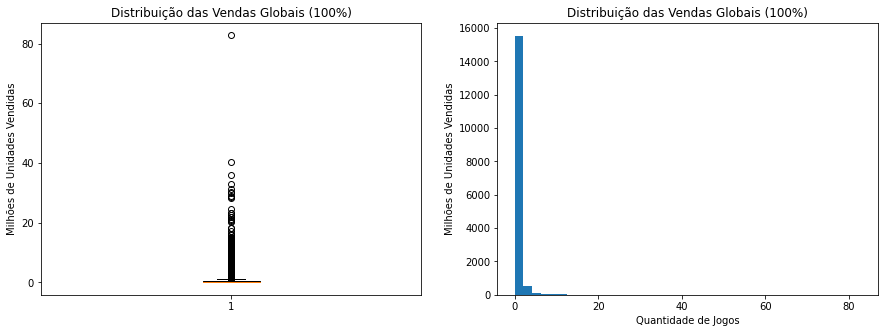

In [ ]:
area



---


Nota-se, ao checar a distribuição de 100% das vendas globais, uma enorme assimetria. Tendo isso em vista,foram feitos então os gráficos abaixo, onde os outliers foram retirados


---



In [ ]:
vendas = dataframe[['vendas_Globais']]

In [ ]:
Q1 = vendas.quantile(.25)
Q3 = vendas.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [ ]:
selecao = (vendas >= limite_inferior) & (vendas <= limite_superior)

In [ ]:
dataframe_II = dataframe[selecao]

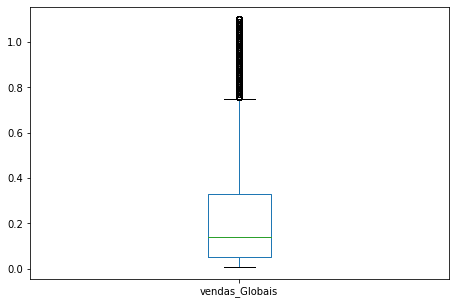

In [ ]:
plt.rc('figure', figsize = (7.5, 5))
dataframe_II.boxplot(['vendas_Globais'], grid=False)

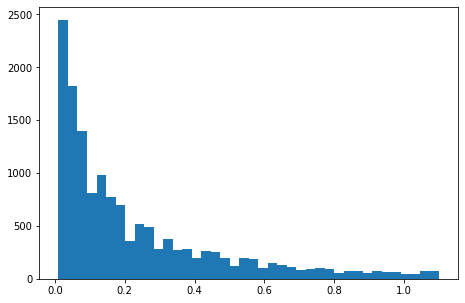

In [ ]:
dataframe_II['vendas_Globais'].hist(bins=40, grid=False)

In [ ]:
dataframe_II['vendas_Globais'].describe()

count    14497.000000
mean         0.234295
std          0.246820
min          0.010000
25%          0.050000
50%          0.140000
75%          0.330000
max          1.100000
Name: vendas_Globais, dtype: float64

In [ ]:
# Checando o valor máximo das vendas globais sem os outliers
dataframe_II['vendas_Globais'].max()

1.1

In [ ]:
# Checando o valor mínimo das vendas globais sem os outliers
dataframe_II['vendas_Globais'].min()

0.01

In [ ]:
# Verificando a quantidade de outliers apagados
len(dataframe_II[dataframe_II['vendas_Globais'].isnull()])

1827

In [ ]:
# Checando, no dataframe anterior, se a linha de código acima está correta
len(dataframe[dataframe['vendas_Globais'].isnull()])

0

---

##Quais são os Video Games que mais venderam?

---

In [ ]:
vendas_por_nome = dataframe.sort_values(by='Ranking').reset_index().head(20)[['Nome', 'vendas_Globais']]
vendas_por_nome.head()

Nome  vendas_Globais
0                Wii Sports           82.74
1         Super Mario Bros.           40.24
2            Mario Kart Wii           35.82
3         Wii Sports Resort           33.00
4  Pokemon Red/Pokemon Blue           31.37

Text(0.5, 0.98, 'Top 20 jogos que mais venderam')

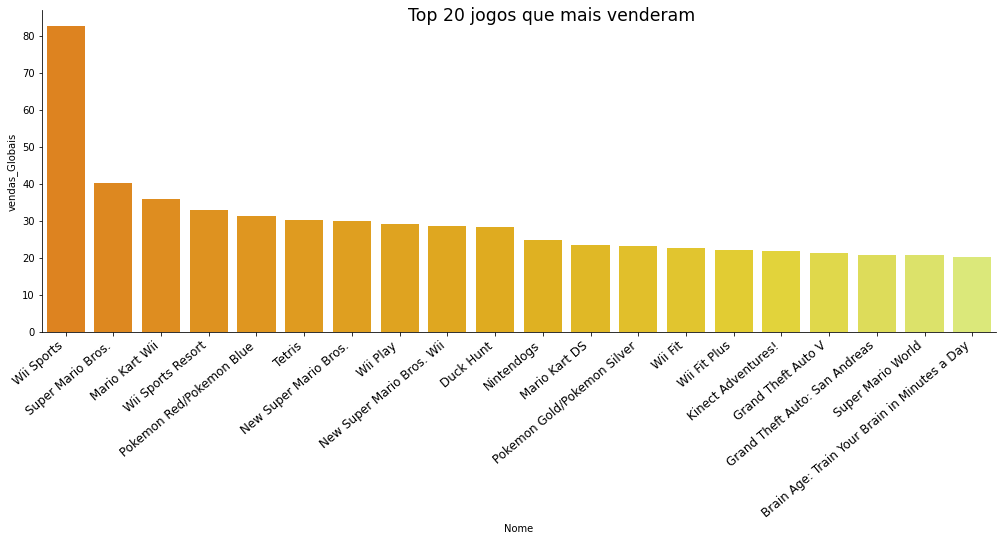

In [ ]:

g_vendasGlobais_porNome = sns.catplot(
    data = vendas_por_nome,
    x = 'Nome', 
    y = 'vendas_Globais',
    kind = 'bar',
    aspect = 3,
    palette = 'Wistia_r'
)


g_vendasGlobais_porNome.set_xticklabels(rotation = 40, horizontalalignment='right', fontsize='large')
g_vendasGlobais_porNome.fig.suptitle('Top 20 jogos que mais venderam', fontsize = 'xx-large')

In [ ]:
sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)

In [ ]:
"""
Fazer um gráfico de acordo com cada região, e outro também com o game mais vendido de cada ano
"""

'\nFazer um gráfico de acordo com cada região, e outro também com o game mais vendido de cada ano\n'

---

##Quais são as editoras que mais venderam?

---

In [ ]:
# Separando as vendas globais por editora, e depois transformando em um dataset
por_editora = dataframe.groupby('Editora')
vendasPor_editora = por_editora['vendas_Globais'].sum().sort_values(ascending=False)

vendasPor_editora = pd.DataFrame(vendasPor_editora)
vendasPor_editora = vendasPor_editora.reset_index()
vendasPor_editora.head(15)

Editora  vendas_Globais
0                                 Nintendo         1784.43
1                          Electronic Arts         1093.39
2                               Activision          721.41
3              Sony Computer Entertainment          607.28
4                                  Ubisoft          473.54
5                     Take-Two Interactive          399.30
6                                      THQ          340.44
7             Konami Digital Entertainment          278.56
8                                     Sega          270.66
9                       Namco Bandai Games          253.65
10                  Microsoft Game Studios          245.79
11                                  Capcom          199.95
12                                   Atari          146.77
13                             Square Enix          144.73
14  Warner Bros. Interactive Entertainment          142.34

In [ ]:
vendasPor_editora.describe()

vendas_Globais
count      576.000000
mean        15.298472
std        102.865275
min          0.010000
25%          0.070000
50%          0.320000
75%          1.632500
max       1784.430000

Text(0.5, 0.98, 'Vendas por editoras')

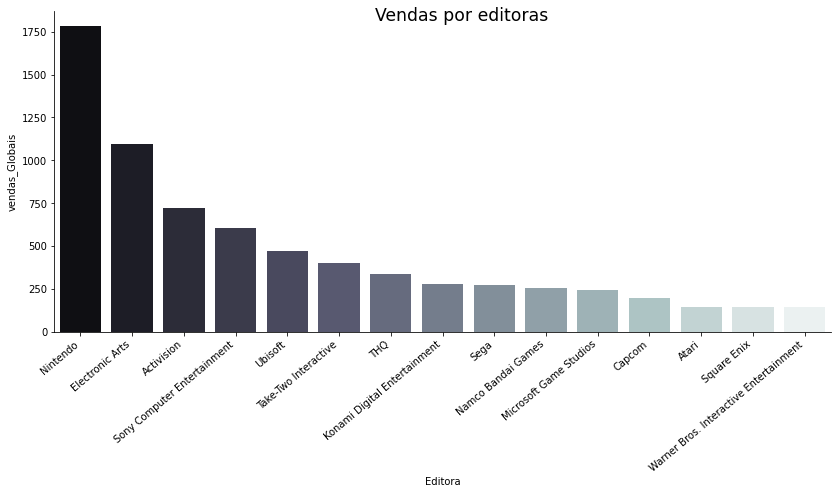

In [ ]:
# Plotando um gráfico que demonstra as vendas globais das 10 editoras que mais vendem
grafico_vendasGlobais_porEditora = sns.catplot(
    data = vendasPor_editora.head(15),
    x = 'Editora', 
    y = 'vendas_Globais',
    kind = 'bar',
    palette = 'bone',
    aspect = 2.5    
)

grafico_vendasGlobais_porEditora.set_xticklabels(rotation = 40, horizontalalignment='right')
grafico_vendasGlobais_porEditora.fig.suptitle('Vendas por editoras', fontsize = 'xx-large')